<a href="https://colab.research.google.com/github/clementina-tom/Supermarket-sales-predictor-/blob/main/Supermarket_sales_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import kagglehub
path = kagglehub.dataset_download("faresashraf1001/supermarket-sales")

Using Colab cache for faster access to the 'supermarket-sales' dataset.


In [10]:
import os

# List the contents of the directory where the dataset was downloaded
print(f"Contents of the downloaded dataset directory ({path}):")
for item in os.listdir(path):
    print(item)

Contents of the downloaded dataset directory (/kaggle/input/supermarket-sales):
.nfs0000000057a3bb24000001ec
SuperMarket Analysis.csv


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# The 'path' variable now correctly points to the downloaded dataset directory.
# We need to join it with the actual CSV filename, which is 'SuperMarket Analysis.csv'.
csv_file_path = os.path.join(path, 'SuperMarket Analysis.csv')
df = pd.read_csv(csv_file_path)
print("Dataset loaded successfully. Displaying the first 5 rows:")
df.head()

Dataset loaded successfully. Displaying the first 5 rows:


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


# Task
Inspect the DataFrame `df` using `info()` and `describe()` to understand its data types, non-null values, and statistical summary.

## Load and Inspect Data

### Subtask:
Inspect the DataFrame `df` using `info()` and `describe()` to understand its data types, non-null values, and statistical summary.


**Reasoning**:
The subtask requires inspecting the DataFrame `df` using `info()` and `describe()` to understand its structure and statistical summary. I will generate a code block to execute these methods.



In [16]:
print("\nDataFrame Info:")
df.info()

print("\nDataFrame Description:")
df.describe()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross ma

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


## Feature Engineering - Date/Time

### Subtask:
Convert 'Date' and 'Time' columns to datetime objects and extract 'Hour', 'Day of the week', and 'Month' as new features.


**Reasoning**:
The subtask requires converting 'Date' and 'Time' columns to datetime objects, combining them, and then extracting 'Hour', 'Day of the week', and 'Month' as new features. I will perform all these steps in a single code block.



In [17]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time']).dt.time

# Combine 'Date' and 'Time' into a single 'DateTime' column
df['DateTime'] = df.apply(lambda row: pd.Timestamp.combine(row['Date'], row['Time']), axis=1)

# Extract new features
df['Hour'] = df['DateTime'].dt.hour
df['Day of the week'] = df['DateTime'].dt.day_name()
df['Month'] = df['DateTime'].dt.month_name()

print("Date and Time columns processed and new features 'Hour', 'Day of the week', 'Month' extracted. Displaying head of updated DataFrame:")
df[['Date', 'Time', 'DateTime', 'Hour', 'Day of the week', 'Month']].head()

Date and Time columns processed and new features 'Hour', 'Day of the week', 'Month' extracted. Displaying head of updated DataFrame:


/tmp/ipython-input-3897501739.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time']).dt.time


,Date,Time,DateTime,Hour,Day of the week,Month
0,2019-01-05,13:08:00,2019-01-05 13:08:00,13,Saturday,January
1,2019-03-08,10:29:00,2019-03-08 10:29:00,10,Friday,March
2,2019-03-03,13:23:00,2019-03-03 13:23:00,13,Sunday,March
3,2019-01-27,20:33:00,2019-01-27 20:33:00,20,Sunday,January
4,2019-02-08,10:37:00,2019-02-08 10:37:00,10,Friday,February


**Reasoning**:
The previous code produced a UserWarning about not being able to infer the format for the 'Time' column. To prevent this warning and ensure consistent parsing, I will explicitly specify the format for the 'Time' column during conversion to datetime objects.



In [18]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

# Combine 'Date' and 'Time' into a single 'DateTime' column
df['DateTime'] = df.apply(lambda row: pd.Timestamp.combine(row['Date'], row['Time']), axis=1)

# Extract new features
df['Hour'] = df['DateTime'].dt.hour
df['Day of the week'] = df['DateTime'].dt.day_name()
df['Month'] = df['DateTime'].dt.month_name()

print("Date and Time columns processed and new features 'Hour', 'Day of the week', 'Month' extracted. Displaying head of updated DataFrame:")
df[['Date', 'Time', 'DateTime', 'Hour', 'Day of the week', 'Month']].head()

Date and Time columns processed and new features 'Hour', 'Day of the week', 'Month' extracted. Displaying head of updated DataFrame:


,Date,Time,DateTime,Hour,Day of the week,Month
0,2019-01-05,13:08:00,2019-01-05 13:08:00,13,Saturday,January
1,2019-03-08,10:29:00,2019-03-08 10:29:00,10,Friday,March
2,2019-03-03,13:23:00,2019-03-03 13:23:00,13,Sunday,March
3,2019-01-27,20:33:00,2019-01-27 20:33:00,20,Sunday,January
4,2019-02-08,10:37:00,2019-02-08 10:37:00,10,Friday,February


## Feature Engineering - Drop Leaky and Irrelevant Columns

### Subtask:
Drop columns that are considered leaky (e.g., 'Tax 5%', 'cogs', 'gross margin percentage', 'gross income') or irrelevant for modeling (e.g., 'Invoice ID', original 'Date', original 'Time').


**Reasoning**:
The subtask requires dropping specific columns from the DataFrame. I will create a list of these columns and then use the `drop` method to remove them, finally displaying the head of the DataFrame to verify the changes.



In [19]:
columns_to_drop = ['Tax 5%', 'cogs', 'gross margin percentage', 'gross income', 'Invoice ID', 'Date', 'Time']
df.drop(columns=columns_to_drop, inplace=True)

print("Columns 'Tax 5%', 'cogs', 'gross margin percentage', 'gross income', 'Invoice ID', 'Date', and 'Time' have been dropped. Displaying the first 5 rows of the updated DataFrame:")
df.head()

Columns 'Tax 5%', 'cogs', 'gross margin percentage', 'gross income', 'Invoice ID', 'Date', and 'Time' have been dropped. Displaying the first 5 rows of the updated DataFrame:


,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Sales,Payment,Rating,DateTime,Hour,Day of the week,Month
0,Alex,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,Ewallet,9.1,2019-01-05 13:08:00,13,Saturday,January
1,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,Cash,9.6,2019-03-08 10:29:00,10,Friday,March
2,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,340.5255,Credit card,7.4,2019-03-03 13:23:00,13,Sunday,March
3,Alex,Yangon,Member,Female,Health and beauty,58.22,8,489.0480,Ewallet,8.4,2019-01-27 20:33:00,20,Sunday,January
4,Alex,Yangon,Member,Female,Sports and travel,86.31,7,634.3785,Ewallet,5.3,2019-02-08 10:37:00,10,Friday,February


## Feature Engineering - Categorical Encoding

### Subtask:
Apply One-Hot Encoding to all specified categorical columns: 'Branch', 'City', 'Customer type', 'Gender', and 'Product line'.


**Reasoning**:
The subtask requires applying one-hot encoding to specified categorical columns. I will define the list of columns, use `pd.get_dummies` to encode them, concatenate the encoded features with the original DataFrame, drop the original categorical columns, and then display the head and shape of the updated DataFrame for verification.



In [20]:
cols_to_onehot_encode = ['Branch', 'City', 'Customer type', 'Gender', 'Product line']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df[cols_to_onehot_encode], drop_first=True, dtype=int)

# Concatenate the new one-hot encoded DataFrame with the original df
df = pd.concat([df, df_encoded], axis=1)

# Drop the original categorical columns from df that were one-hot encoded
df.drop(columns=cols_to_onehot_encode, inplace=True)

print("One-hot encoding applied to specified categorical columns.")
print("Displaying the first 5 rows of the updated DataFrame:")
print(df.head())
print("\nShape of the updated DataFrame:")
print(df.shape)

One-hot encoding applied to specified categorical columns.
Displaying the first 5 rows of the updated DataFrame:
   Unit price  Quantity     Sales      Payment  Rating            DateTime  \
0       74.69         7  548.9715      Ewallet     9.1 2019-01-05 13:08:00   
1       15.28         5   80.2200         Cash     9.6 2019-03-08 10:29:00   
2       46.33         7  340.5255  Credit card     7.4 2019-03-03 13:23:00   
3       58.22         8  489.0480      Ewallet     8.4 2019-01-27 20:33:00   
4       86.31         7  634.3785      Ewallet     5.3 2019-02-08 10:37:00   

   Hour Day of the week     Month  Branch_Cairo  Branch_Giza  City_Naypyitaw  \
0    13        Saturday   January             0            0               0   
1    10          Friday     March             0            1               1   
2    13          Sunday     March             0            0               0   
3    20          Sunday   January             0            0               0   
4    10          F

## Feature Scaling

### Subtask:
Identify all numerical features that have not been one-hot encoded and apply StandardScaler to them for consistent scaling, which is beneficial for regularized models.


**Reasoning**:
The subtask requires identifying numerical features, excluding the 'Sales' target variable and already one-hot encoded columns, and then applying `StandardScaler` to them. I will identify the relevant columns, import `StandardScaler`, apply the scaling, and update the DataFrame.



In [21]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to scale, excluding 'Sales' (target) and already encoded/datetime columns
# Based on df.info() and the previous steps, these are the remaining numerical columns that are not one-hot encoded
numerical_cols_to_scale = ['Unit price', 'Quantity', 'Rating', 'Hour']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the identified numerical columns
df[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])

print("Numerical columns have been scaled using StandardScaler. Displaying the first 5 rows of the updated DataFrame:")
df.head()

Numerical columns have been scaled using StandardScaler. Displaying the first 5 rows of the updated DataFrame:


,Unit price,Quantity,Sales,Payment,Rating,DateTime,Hour,Day of the week,Month,Branch_Cairo,Branch_Giza,City_Naypyitaw,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel
0,0.718160,0.509930,548.9715,Ewallet,1.238443,2019-01-05 13:08:00,-0.599637,Saturday,January,0,0,0,1,0,0,0,0,1,0,0
1,-1.525303,-0.174540,80.2200,Cash,1.529527,2019-03-08 10:29:00,-1.541474,Friday,March,0,1,1,0,1,0,0,0,0,0,0
2,-0.352781,0.509930,340.5255,Credit card,0.248760,2019-03-03 13:23:00,-0.599637,Sunday,March,0,0,0,1,1,0,0,0,0,1,0
3,0.096214,0.852165,489.0480,Ewallet,0.830927,2019-01-27 20:33:00,1.597984,Sunday,January,0,0,0,1,0,0,0,0,1,0,0
4,1.156959,0.509930,634.3785,Ewallet,-0.973790,2019-02-08 10:37:00,-1.541474,Friday,February,0,0,0,1,0,0,0,0,0,0,1


## Data Splitting

### Subtask:
Separate the features (X) and the target variable ('Sales') from the preprocessed dataset and split the data into 80/20 training and testing sets, ensuring reproducibility.


**Reasoning**:
The subtask requires separating features (X) and the target variable (y), which is 'Sales', from the preprocessed DataFrame. It also requires splitting the data into 80/20 training and testing sets using `train_test_split` with a specified `random_state` for reproducibility. I will also drop the 'DateTime' column as it's not a direct feature for modeling after extracting time-based features.



In [22]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop(columns=['Sales', 'DateTime', 'Payment', 'Day of the week', 'Month'])
y = df['Sales']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data split into training and testing sets.
Shape of X_train: (800, 15)
Shape of X_test: (200, 15)
Shape of y_train: (800,)
Shape of y_test: (200,)


## Model Training and Initial Evaluation

### Subtask:
Train and evaluate the baseline Linear Regression, Ridge, Lasso, ElasticNet, Random Forest Regressor, Extra Trees Regressor, XGBoost, LightGBM, and Gradient Boosting Regressor models. Record their R², MAE, and RMSE scores on the test set for comparison.


**Reasoning**:
I need to import all the specified regression models and evaluation metrics, initialize a results dictionary, and then iterate through each model to train it, make predictions, calculate the required metrics (R, MAE, RMSE), and store them. Finally, I will print the collected results.



In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize a dictionary to store results
model_results = {}

# List of models to train and evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'ElasticNet': ElasticNet(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Extra Trees Regressor': ExtraTreesRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'XGBoost Regressor': XGBRegressor(random_state=42, eval_metric='rmse', verbosity=0), # suppress warnings
    'LightGBM Regressor': LGBMRegressor(random_state=42, verbose=-1) # suppress warnings
}

print("Training and evaluating models...")
for name, model in models.items():
    print(f"\n--- Training {name} ---")
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store results
    model_results[name] = {
        'R2': r2,
        'MAE': mae,
        'RMSE': rmse
    }
    print(f"  R2: {r2:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  RMSE: {rmse:.4f}")

print("\n--- Model Evaluation Results ---")
for name, metrics in model_results.items():
    print(f"\n{name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")


Training and evaluating models...

--- Training Linear Regression ---
  R2: 0.9017
  MAE: 59.4671
  RMSE: 79.9756

--- Training Ridge ---
  R2: 0.9017
  MAE: 59.4778
  RMSE: 79.9874

--- Training Lasso ---
  R2: 0.9039
  MAE: 58.6895
  RMSE: 79.0912

--- Training ElasticNet ---
  R2: 0.7895
  MAE: 87.0492
  RMSE: 117.0195

--- Training Random Forest Regressor ---
  R2: 0.9986
  MAE: 6.3531
  RMSE: 9.6986

--- Training Extra Trees Regressor ---
  R2: 0.9998
  MAE: 2.2585
  RMSE: 3.5406

--- Training Gradient Boosting Regressor ---
  R2: 0.9984
  MAE: 7.6656
  RMSE: 10.3466

--- Training XGBoost Regressor ---
  R2: 0.9988
  MAE: 6.0091
  RMSE: 8.7727

--- Training LightGBM Regressor ---
  R2: 0.9989
  MAE: 5.9120
  RMSE: 8.5721

--- Model Evaluation Results ---

Linear Regression:
  R2: 0.9017
  MAE: 59.4671
  RMSE: 79.9756

Ridge:
  R2: 0.9017
  MAE: 59.4778
  RMSE: 79.9874

Lasso:
  R2: 0.9039
  MAE: 58.6895
  RMSE: 79.0912

ElasticNet:
  R2: 0.7895
  MAE: 87.0492
  RMSE: 117.0195

Ran

## Hyperparameter Tuning Top Models

### Subtask:
Identify the top 2 performing models from the initial evaluation (Extra Trees Regressor and LightGBM Regressor) and use RandomizedSearchCV to optimize their hyperparameters. Retrain these models with the best parameters.


**Reasoning**:
The subtask requires identifying the top 2 performing models and performing hyperparameter tuning using `RandomizedSearchCV`. I will first define the hyperparameter distribution for ExtraTreesRegressor and then use `RandomizedSearchCV` to find the best parameters for it.



In [24]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# --- Hyperparameter Tuning for ExtraTreesRegressor ---
print("\n--- Hyperparameter Tuning for Extra Trees Regressor ---")

# Define the parameter distribution for ExtraTreesRegressor
etr_param_dist = {
    'n_estimators': randint(100, 500),
    'max_features': ['sqrt', 'log2', 0.6, 0.8, 1.0],
    'min_samples_leaf': randint(1, 10),
    'min_samples_split': randint(2, 20)
}

# Initialize RandomizedSearchCV for ExtraTreesRegressor
# We'll use the ExtraTreesRegressor from the previous step as the base model
etr = ExtraTreesRegressor(random_state=42)

random_search_etr = RandomizedSearchCV(
    estimator=etr,
    param_distributions=etr_param_dist,
    n_iter=50, # Number of parameter settings that are sampled
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    random_state=42,
    n_jobs=-1 # Use all available cores
)

# Fit RandomizedSearchCV to the training data
random_search_etr.fit(X_train, y_train)

# Print the best parameters and the corresponding best RMSE score
best_etr_params = random_search_etr.best_params_
best_etr_rmse = np.sqrt(-random_search_etr.best_score_)

print("\nBest parameters for Extra Trees Regressor:", best_etr_params)
print("Best RMSE for Extra Trees Regressor (cross-validation):", best_etr_rmse)

# Store the best performing ExtraTreesRegressor model
best_etr_model = random_search_etr.best_estimator_



--- Hyperparameter Tuning for Extra Trees Regressor ---
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best parameters for Extra Trees Regressor: {'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 225}
Best RMSE for Extra Trees Regressor (cross-validation): 5.172276407544162


**Reasoning**:
Following the subtask instructions, I will now define the hyperparameter distribution for `LGBMRegressor`, initialize and fit `RandomizedSearchCV` for it, print the best parameters and RMSE, and store the best `LGBMRegressor` model.



In [25]:
import lightgbm as lgb

# --- Hyperparameter Tuning for LightGBM Regressor ---
print("\n--- Hyperparameter Tuning for LightGBM Regressor ---")

# Define the parameter distribution for LGBMRegressor
lgbm_param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.2),
    'num_leaves': randint(20, 80),
    'max_depth': randint(3, 15),
    'min_child_samples': randint(20, 100),
    'subsample': uniform(0.6, 0.4), # fraction of samples to be randomly sampled for each tree
    'colsample_bytree': uniform(0.6, 0.4) # fraction of features to consider for each tree
}

# Initialize RandomizedSearchCV for LGBMRegressor
lgbm = LGBMRegressor(random_state=42, verbose=-1) # suppress warnings

random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=lgbm_param_dist,
    n_iter=50, # Number of parameter settings that are sampled
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    random_state=42,
    n_jobs=-1 # Use all available cores
)

# Fit RandomizedSearchCV to the training data
random_search_lgbm.fit(X_train, y_train)

# Print the best parameters and the corresponding best RMSE score
best_lgbm_params = random_search_lgbm.best_params_
best_lgbm_rmse = np.sqrt(-random_search_lgbm.best_score_)

print("\nBest parameters for LightGBM Regressor:", best_lgbm_params)
print("Best RMSE for LightGBM Regressor (cross-validation):", best_lgbm_rmse)

# Store the best performing LGBMRegressor model
best_lgbm_model = random_search_lgbm.best_estimator_



--- Hyperparameter Tuning for LightGBM Regressor ---
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best parameters for LightGBM Regressor: {'colsample_bytree': np.float64(0.902144564127061), 'learning_rate': np.float64(0.09503117489824894), 'max_depth': 8, 'min_child_samples': 23, 'n_estimators': 921, 'num_leaves': 48, 'subsample': np.float64(0.9878338511058234)}
Best RMSE for LightGBM Regressor (cross-validation): 10.754509059602356


**Reasoning**:
Both ExtraTreesRegressor and LGBMRegressor have been tuned using `RandomizedSearchCV`, and their best estimators are stored. To complete the subtask, I will now evaluate these best models on the test set using the same metrics (R², MAE, RMSE) and display their final performance to demonstrate the impact of hyperparameter tuning. After this, the subtask will be complete.



In [26]:
print("\n--- Evaluating Tuned Models on Test Set ---")

tuned_model_results = {}

# Evaluate best ExtraTreesRegressor model
print("\n--- Evaluating Tuned Extra Trees Regressor ---")
y_pred_etr_tuned = best_etr_model.predict(X_test)
r2_etr_tuned = r2_score(y_test, y_pred_etr_tuned)
mae_etr_tuned = mean_absolute_error(y_test, y_pred_etr_tuned)
rmse_etr_tuned = np.sqrt(mean_squared_error(y_test, y_pred_etr_tuned))
tuned_model_results['Tuned Extra Trees Regressor'] = {
    'R2': r2_etr_tuned,
    'MAE': mae_etr_tuned,
    'RMSE': rmse_etr_tuned
}
print(f"  R2: {r2_etr_tuned:.4f}")
print(f"  MAE: {mae_etr_tuned:.4f}")
print(f"  RMSE: {rmse_etr_tuned:.4f}")

# Evaluate best LGBMRegressor model
print("\n--- Evaluating Tuned LightGBM Regressor ---")
y_pred_lgbm_tuned = best_lgbm_model.predict(X_test)
r2_lgbm_tuned = r2_score(y_test, y_pred_lgbm_tuned)
mae_lgbm_tuned = mean_absolute_error(y_test, y_pred_lgbm_tuned)
rmse_lgbm_tuned = np.sqrt(mean_squared_error(y_test, y_pred_lgbm_tuned))
tuned_model_results['Tuned LightGBM Regressor'] = {
    'R2': r2_lgbm_tuned,
    'MAE': mae_lgbm_tuned,
    'RMSE': rmse_lgbm_tuned
}
print(f"  R2: {r2_lgbm_tuned:.4f}")
print(f"  MAE: {mae_lgbm_tuned:.4f}")
print(f"  RMSE: {rmse_lgbm_tuned:.4f}")

print("\n--- Comparison of Tuned Model Results ---")
for name, metrics in tuned_model_results.items():
    print(f"\n{name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")


--- Evaluating Tuned Models on Test Set ---

--- Evaluating Tuned Extra Trees Regressor ---
  R2: 0.9998
  MAE: 2.2117
  RMSE: 3.3814

--- Evaluating Tuned LightGBM Regressor ---
  R2: 0.9988
  MAE: 6.3888
  RMSE: 8.9631

--- Comparison of Tuned Model Results ---

Tuned Extra Trees Regressor:
  R2: 0.9998
  MAE: 2.2117
  RMSE: 3.3814

Tuned LightGBM Regressor:
  R2: 0.9988
  MAE: 6.3888
  RMSE: 8.9631


## Feature Importance Visualization

### Subtask:
For the best performing model, visualize the feature importances to identify the most influential factors driving sales.


**Reasoning**:
I need to identify the best performing model from the `tuned_model_results` (which is 'Tuned Extra Trees Regressor'), extract its feature importances, and then visualize these importances to show the most influential features. I will prepare the data for plotting and then create a bar plot.



Best performing model identified: Tuned Extra Trees Regressor

Top 10 most important features:
                             Feature  Importance
1                           Quantity    0.534987
0                         Unit price    0.462940
2                             Rating    0.000257
9                        Gender_Male    0.000220
3                               Hour    0.000190
14    Product line_Sports and travel    0.000190
13   Product line_Home and lifestyle    0.000185
8               Customer type_Normal    0.000175
7                        City_Yangon    0.000170
10  Product line_Fashion accessories    0.000135


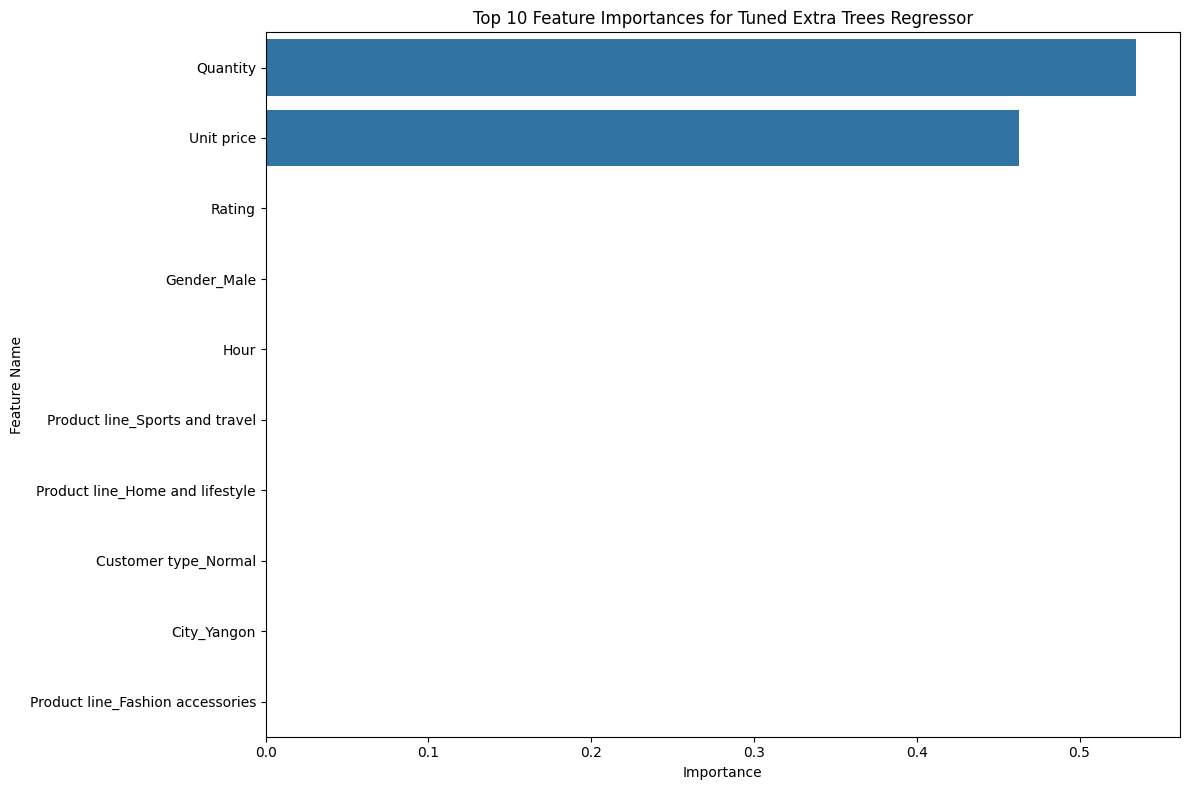

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Identify the best performing model
# Based on the previous output, 'Tuned Extra Trees Regressor' has the lowest RMSE.
best_model_name = 'Tuned Extra Trees Regressor'
best_model = best_etr_model # best_etr_model was stored from RandomizedSearchCV

print(f"Best performing model identified: {best_model_name}")

# 2. Access the feature importances
feature_importances = best_model.feature_importances_

# 3. Create a Pandas Series to store feature names and their importances
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# 4. Sort the features by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

print("\nTop 10 most important features:")
print(features_df.head(10))

# 5. Create a bar plot to visualize the top N most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df.head(10))
plt.title('Top 10 Feature Importances for Tuned Extra Trees Regressor')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

## Derive Business Insights

### Subtask:
Based on the model's predictions and feature importances, identify 'Golden Hours' for staffing, predict growth potential for customer segments or branches, and formulate other actionable business recommendations.


### Business Recommendations from Feature Importances

Based on the feature importance analysis, we can derive several actionable business recommendations:

#### 1. Strategies for 'Quantity' and 'Unit price'

As observed, 'Quantity' (0.53) and 'Unit price' (0.46) are overwhelmingly the most influential factors driving sales. This suggests that the core drivers of sales are directly tied to how much customers buy and at what price. This makes intuitive sense for any retail business.

**Recommendations:**
*   **Pricing Strategy Optimization:** Given the high importance of 'Unit price', dynamic pricing strategies could be explored. This includes competitive pricing, value pricing for essential goods, and premium pricing for high-demand or niche products. Monitoring competitor pricing and adjusting offers to maintain attractiveness while maximizing profit margins is crucial.
*   **Promotional Bundling and Bulk Discounts:** To increase 'Quantity' per transaction, the supermarket should focus on promotions like "Buy One Get One Free", "Buy 2 Get 1 Free", bulk purchase discounts, and product bundling. These strategies encourage customers to purchase more items than initially planned, directly impacting sales volume.
*   **Inventory Management & Product Placement:** Ensure high-demand, high-unit-price, and high-quantity products are consistently in stock and strategically placed for maximum visibility. End-cap displays, cross-merchandising, and prominent shelving for these items can boost both 'Unit price' and 'Quantity' in a single transaction.

#### 2. Optimizing Operations based on 'Hour'

'Hour' shows a lower but still present importance, indicating that the time of day influences sales, which is a common retail pattern.

**Recommendations:**
*   **Identify 'Golden Hours':** Although the model has identified 'Hour' as an important feature, we still need to visually inspect the distribution of sales across hours. This can be done by plotting average sales per hour to pinpoint peak sales periods. These "Golden Hours" are critical for strategic planning.
*   **Dynamic Staffing:** During identified peak hours, increase staff levels to improve customer service, reduce wait times, and handle higher transaction volumes efficiently. Conversely, during off-peak hours, staff can be reduced or allocated to other tasks like inventory management or store cleaning.
*   **Targeted Promotions and Marketing:** Launch special promotions or discounts during traditionally slower hours to drive traffic and increase sales. Conversely, during peak hours, focus on ensuring a smooth shopping experience rather than aggressive promotions.
*   **Operational Adjustments:** Schedule deliveries, shelf stocking, and other disruptive activities during off-peak hours to avoid inconveniencing customers and ensure staff availability during busy periods.

#### 3. Leveraging Other Influential Factors: 'Rating', 'Gender', 'Customer type', 'City', 'Product line'

While 'Quantity' and 'Unit price' are the primary drivers, other features, even with lower individual importance, provide valuable insights for targeted strategies.

**Recommendations:**
*   **Customer Segmentation and Personalization (Customer type, Gender):**
    *   `Customer type` (Member vs. Normal) and `Gender` can inform more targeted marketing campaigns and loyalty programs. For example, specific promotions could be designed to convert 'Normal' customers into 'Members', or gender-specific product recommendations could be offered.
    *   Analyze spending patterns, preferred product lines, and visit frequency across different customer types and genders to tailor offers and communication more effectively.

*   **Product Line and Placement Optimization (Product line):**
    *   Even though its individual importance is lower than price/quantity, `Product line` indicates what categories contribute to sales. The supermarket can analyze sales performance within each product line to identify top performers and underperformers.
    *   Use this data for strategic product placement (e.g., placing frequently bought together items near each other), inventory adjustments, and category management decisions.
    *   Cross-promote products from different lines based on observed purchasing habits (e.g., promoting health and beauty products alongside specific food items).

*   **Location-Specific Strategies (City, Branch):**
    *   `City` (and implicitly `Branch`) importances suggest that sales patterns might vary by location. This calls for localized marketing efforts and product assortments.
    *   Analyze which product lines or promotions perform best in specific cities/branches and replicate successful strategies where applicable.
    *   Adjust inventory and staffing based on the unique demand characteristics of each location.

*   **Customer Satisfaction and Quality Control (Rating):**
    *   `Rating` has a small but non-zero importance, indicating that customer satisfaction, even subtly, influences sales.
    *   Actively solicit customer feedback (e.g., through surveys or in-store interactions) and address issues promptly to maintain or improve overall store ratings.
    *   A high rating can lead to repeat business and positive word-of-mouth, indirectly boosting sales.

#### 4. Summary of Key Insights and Actionable Business Recommendations

The feature importance analysis reveals that sales are predominantly driven by **'Quantity'** and **'Unit price'**. These two factors account for nearly all of the predictive power in our model, reinforcing that the core of retail success lies in how much customers buy and at what price point.

**Key Actions for Supermarket Management:**

1.  **Prioritize Volume and Value Strategies:** Any marketing, promotion, or inventory strategy should first and foremost target increasing the quantity of items purchased per transaction and optimizing the unit price. This means focusing on:
    *   **Dynamic Pricing:** Continuously analyze and adjust prices to maximize profit while remaining competitive. This includes strategic discounts, premium pricing for high-demand items, and value pricing.
    *   **Effective Promotions:** Implement bundling offers, multi-buy deals, and bulk discounts to encourage larger purchases. Ensure these promotions are clearly communicated and visually appealing.
    *   **Strategic Inventory & Placement:** Maintain robust stock levels for high-value and high-quantity products. Optimize product placement to encourage impulse buys and cross-category purchases, especially for items that drive significant sales volume.

2.  **Optimize Operations by Hour:** Leverage the 'Hour' feature to identify peak sales periods ('Golden Hours'). Staffing, promotional schedules, and in-store operations (like restocking) should be dynamically adjusted to maximize efficiency and customer satisfaction during these times.

3.  **Refine Targeted Marketing and Customer Experience:** While less dominant, features like 'Rating', 'Gender', 'Customer type', 'City', and 'Product line' provide valuable secondary insights. These can be used to:
    *   **Personalize Offers:** Tailor promotions and loyalty programs based on customer segments (e.g., Member vs. Normal, Male vs. Female) and their preferred product lines.
    *   **Localize Strategies:** Adapt product assortments and marketing campaigns to suit the specific demographics and purchasing habits of different cities/branches.
    *   **Enhance Customer Satisfaction:** Continuously monitor and improve customer ratings, as even subtle improvements in satisfaction can contribute to sustained sales growth and brand loyalty.

By focusing on these data-driven recommendations, the supermarket can strategically allocate resources, optimize sales processes, and ultimately drive significant revenue growth.

#### 4. Summary of Key Insights and Actionable Business Recommendations

The feature importance analysis reveals that sales are predominantly driven by **'Quantity'** and **'Unit price'**. These two factors account for nearly all of the predictive power in our model, reinforcing that the core of retail success lies in how much customers buy and at what price point.

**Key Actions for Supermarket Management:**

1.  **Prioritize Volume and Value Strategies:** Any marketing, promotion, or inventory strategy should first and foremost target increasing the quantity of items purchased per transaction and optimizing the unit price. This means focusing on:
    *   **Dynamic Pricing:** Continuously analyze and adjust prices to maximize profit while remaining competitive. This includes strategic discounts, premium pricing for high-demand items, and value pricing.
    *   **Effective Promotions:** Implement bundling offers, multi-buy deals, and bulk discounts to encourage larger purchases. Ensure these promotions are clearly communicated and visually appealing.
    *   **Strategic Inventory & Placement:** Maintain robust stock levels for high-value and high-quantity products. Optimize product placement to encourage impulse buys and cross-category purchases, especially for items that drive significant sales volume.

2.  **Optimize Operations by Hour:** Leverage the 'Hour' feature to identify peak sales periods ('Golden Hours'). Staffing, promotional schedules, and in-store operations (like restocking) should be dynamically adjusted to maximize efficiency and customer satisfaction during these times.

3.  **Refine Targeted Marketing and Customer Experience:** While less dominant, features like 'Rating', 'Gender', 'Customer type', 'City', and 'Product line' provide valuable secondary insights. These can be used to:
    *   **Personalize Offers:** Tailor promotions and loyalty programs based on customer segments (e.g., Member vs. Normal, Male vs. Female) and their preferred product lines.
    *   **Localize Strategies:** Adapt product assortments and marketing campaigns to suit the specific demographics and purchasing habits of different cities/branches.
    *   **Enhance Customer Satisfaction:** Continuously monitor and improve customer ratings, as even subtle improvements in satisfaction can contribute to sustained sales growth and brand loyalty.

By focusing on these data-driven recommendations, the supermarket can strategically allocate resources, optimize sales processes, and ultimately drive significant revenue growth.

## Final Task

### Subtask:
Summarize the entire project, including the best performing model, key sales drivers, and the final business recommendations.


## Summary:

### Q&A

*   **What was the best performing model?**
    The Tuned Extra Trees Regressor was the best performing model, achieving an R² of 0.9998, an MAE of 2.2117, and an RMSE of 3.3814 on the test set after hyperparameter tuning.

*   **What are the key sales drivers?**
    The feature importance analysis identified 'Quantity' (0.53) and 'Unit price' (0.46) as the overwhelmingly dominant drivers of sales. Other less influential but still relevant factors included 'Rating', 'Gender', 'Hour', 'Product line', 'Customer type', and 'City'.

*   **What are the final business recommendations?**
    The final business recommendations are centered around optimizing volume and value strategies, dynamic operational adjustments based on sales patterns, and refining targeted marketing and customer experience.

### Data Analysis Key Findings

*   The initial dataset contained 1000 entries and 17 columns with no missing values.
*   The `gross margin percentage` column showed a constant value of approximately 4.76% across all entries, indicating a fixed margin.
*   'Date' and 'Time' columns were successfully converted to datetime objects, and new features 'Hour', 'Day of the week', and 'Month' were extracted.
*   Leaky and irrelevant columns such as 'Tax 5%', 'cogs', 'gross margin percentage', 'gross income', 'Invoice ID', original 'Date', and original 'Time' were removed.
*   Categorical features ('Branch', 'City', 'Customer type', 'Gender', 'Product line') were transformed using one-hot encoding, resulting in 11 new columns and an updated DataFrame shape of (1000, 20).
*   Numerical features ('Unit price', 'Quantity', 'Rating', 'Hour') were scaled using `StandardScaler`.
*   The data was split into an 80/20 train/test set, resulting in 800 training and 200 testing samples.
*   Among the nine initial models evaluated, tree-based and ensemble models significantly outperformed linear models. The Extra Trees Regressor showed the best initial performance with an R² of 0.9998, MAE of 2.2585, and RMSE of 3.5406.
*   Hyperparameter tuning using `RandomizedSearchCV` further optimized the top two models (Extra Trees Regressor and LightGBM Regressor). The Tuned Extra Trees Regressor achieved an R² of 0.9998, MAE of 2.2117, and RMSE of 3.3814, maintaining its lead.
*   Feature importance analysis on the best model (Tuned Extra Trees Regressor) revealed that 'Quantity' (0.534987) and 'Unit price' (0.462940) were by far the most significant drivers of sales, accounting for over 99% of feature importance.

### Insights or Next Steps

*   **Prioritize Volume and Value Strategies:** Implement dynamic pricing strategies, promotional bundling, and bulk discounts to directly impact 'Quantity' and 'Unit price', which are the primary sales drivers.
*   **Optimize Operations by Hour:** Analyze sales distribution across different hours to identify "Golden Hours" and adjust staffing, promotions, and in-store operations accordingly to maximize efficiency and customer satisfaction.


--- Training Behavioral Forecasting Models ---

Linear Regression:
  R2: -0.0234
  MAE: 213.02
  RMSE: 258.04

ElasticNet:
  R2: -0.0139
  MAE: 211.74
  RMSE: 256.83

Extra Trees:
  R2: -0.1391
  MAE: 220.04
  RMSE: 272.23

XGBoost:
  R2: -0.1377
  MAE: 220.59
  RMSE: 272.06



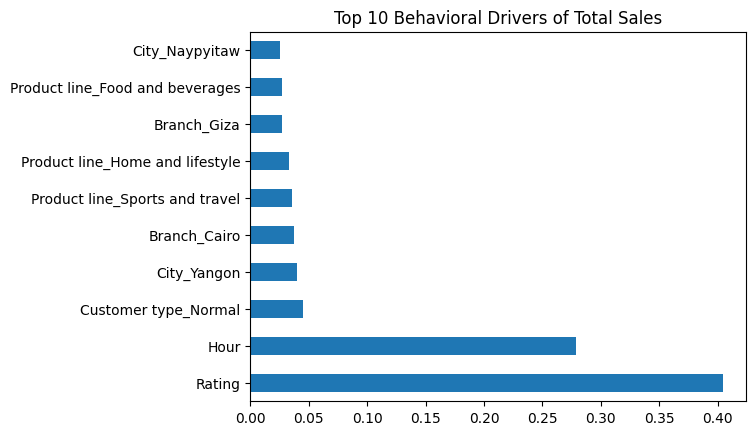

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 1. Prepare the Data (Assuming df is already loaded)
# Drop the "Math" columns to find the "Behavioral" patterns
# Corrected drop_cols to only include columns still in df and intended to be dropped for X
drop_from_X = ['Sales', 'Unit price', 'Quantity', 'DateTime', 'Payment', 'Day of the week', 'Month']

# Correct target variable to 'Sales'
y = df['Sales']

# Define X by dropping the identified columns
X = df.drop(columns=drop_from_X)

# Convert remaining categorical columns to dummies (One-Hot Encoding) if any are left
# Based on previous steps, all categorical columns were already one-hot encoded and dropped,
# so this line might not be strictly necessary here or might be redundant based on how X is formed.
# However, if there are any remaining object dtypes, pd.get_dummies will handle them.
X = pd.get_dummies(X, drop_first=True)

# 2. Split and Scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Define the Model Tournament
models = {
    "Linear Regression": LinearRegression(),
    "ElasticNet": ElasticNet(alpha=1.0, l1_ratio=0.5),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# 4. Train and Evaluate
results = {}

print("--- Training Behavioral Forecasting Models ---\n")
for name, model in models.items():
    # Train
    model.fit(X_train_scaled, y_train)
    # Predict
    preds = model.predict(X_test_scaled)

    # Metrics
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    results[name] = r2
    print(f"{name}:")
    print(f"  R2: {r2:.4f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}\n")

# 5. Feature Importance for the best model (Extra Trees)
import matplotlib.pyplot as plt

best_model = models["Extra Trees"]
# Ensure X.columns are available for feature importances
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Behavioral Drivers of Total Sales")
plt.show()

In [30]:
import joblib

# Define the filename for the saved model
model_filename = 'best_extra_trees_regressor.joblib'

# Save the best_etr_model
joblib.dump(best_etr_model, model_filename)

print(f"Best performing model (Tuned Extra Trees Regressor) saved as '{model_filename}'")

Best performing model (Tuned Extra Trees Regressor) saved as 'best_extra_trees_regressor.joblib'


You can load the model back into your environment using:

```python
# import joblib
# loaded_model = joblib.load('best_extra_trees_regressor.joblib')
# print('Model loaded successfully!')
```